In [1]:
from methods.ManiGPClassifier import ManiGPClassifier

In [2]:
from read_file import read_file

In [3]:
X, y, label_names = read_file('appendicitis.tsv')

In [4]:
X.head()

,0,1,2,3,4,5,6
0,-0.766284,-0.844828,-0.877095,-0.592292,-0.636620,0.019589,-0.713568
1,0.172414,-0.155172,0.094972,-0.141988,-0.061972,-0.011753,0.154774
2,-1.191571,-1.000000,-1.234637,-0.365112,-0.512676,-0.932419,-1.252261
3,-0.865900,-2.387931,-1.256983,-0.365112,-0.473239,-2.393732,-1.256281
4,-0.678161,0.232759,-0.571695,-0.141988,-0.264789,0.047013,-0.629146


In [5]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [6]:
label_names

array(['At1', 'At2', 'At3', 'At4', 'At5', 'At6', 'At7'], dtype='<U3')

In [7]:
# Angles classifier
manigpclf = ManiGPClassifier(n_iter=100, fitness_function="angles",pop_size=100)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.75,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=None)

In [10]:
manigpclf.fit(X_train, y_train)

In [11]:
from operator import attrgetter
get_height = lambda tree : attrgetter('height')(tree)
str(manigpclf.model[0]), str(manigpclf.model[1]), get_height(manigpclf.model[0]), get_height(manigpclf.model[1])

('left(modulus(x6, 55.63820713889929), x3)',
 'addition(abs(modulus(x4, subtract(x5, x6))), addition(gt(1.0, x4), max(x0, x2)))',
 2,
 4)

In [12]:
manigpclf.best_fitness, manigpclf.fitness_function, manigpclf.get_params()

(0.9131944444444444,
 'angles',
 {'cxpb': 0.1,
  'fitness_function': 'angles',
  'max_tree_height': 4,
  'min_tree_height': 1,
  'mutpb': 0.9,
  'n_components': 2,
  'n_iter': 100,
  'pop_size': 100,
  'predictor': 'kmeans',
  'random_state': 3319,
  'tourn_size': 7,
  'weights': (1.0,)})

In [13]:
X_train_reduced = manigpclf.reduce(manigpclf.model, X_train)

In [14]:
import matplotlib.pyplot as plt

In [15]:
def plot(X, y): # 2 classes only
    if (len(X.shape) != 2 or X.shape[1] != 2):
        return
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=2**6, c='r', alpha=0.33, label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='b', marker='^', alpha=0.33, label='1')
    plt.legend()

def plot3classes(X,y):
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=2**6, c='r', alpha=0.33, label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='b', marker='^', alpha=0.33, label='1')
    plt.scatter(X[y==2][:, 0], X[y==2][:, 1], c='g', marker='d', alpha=0.33, label='2')
    plt.legend()

In [16]:
%matplotlib inline

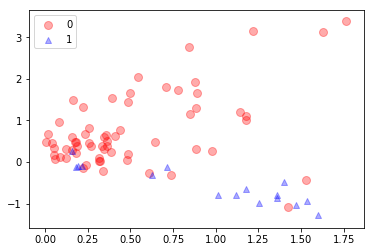

In [17]:
plot(X_train_reduced, y_train)

In [18]:
manigpclf.evaluate(manigpclf.model, X_train, y_train, manigpclf.random_state)

0.9131944444444444

In [19]:
#-------------------------------------------------

In [20]:
X_test_reduced = manigpclf.reduce(manigpclf.model, X_test)

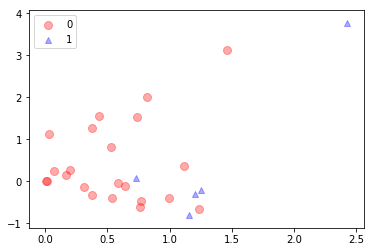

In [21]:
plot(X_test_reduced, y_test)

In [22]:
from utils.metrics import balanced_accuracy_score

In [23]:
balanced_accuracy_score(y_test, manigpclf.predict(X_test))

0.4636363636363636

In [24]:
manigpclf.rejected

4740

In [25]:
manigpclf.mut_count

9633

In [26]:
manigpclf.cx_count

513

In [27]:
X_train_reduced

array([[ 1.25226131, -0.99873693],
       [ 0.48442211,  1.45484946],
       [ 0.54472362,  2.04211061],
       [ 0.44020101,  0.78210005],
       [ 1.35678392, -0.85641671],
       [ 0.88643216,  0.31899748],
       [ 0.21909548,  1.32409028],
       [ 1.52964824, -0.44304942],
       [ 0.22311558, -0.13282869],
       [ 1.1758794 ,  1.11528198],
       [ 0.00603015,  0.47002286],
       [ 0.84623116,  2.77249494],
       [ 0.87839196,  1.91750429],
       [ 0.60904523, -0.27644976],
       [ 0.35979899,  0.50826448],
       [ 0.62914573, -0.30690587],
       [ 0.85025126,  1.15605202],
       [ 0.71356784, -0.12966381],
       [ 0.64522613,  0.48280716],
       [ 0.05829146,  0.06771724],
       [ 1.40100503, -0.46969712],
       [ 1.01507538, -0.78496266],
       [ 1.53366834, -0.93038527],
       [ 0.25527638,  0.44779889],
       [ 0.35577889,  0.66197836],
       [ 0.97889447,  0.25387721],
       [ 0.19095477, -0.10670381],
       [ 0.23517588,  0.67695154],
       [ 0.33969849,